# Generative Adversarial Networks
## Optimisation de profil d'aile par machine learning

Inspiration: https://realpython.com/generative-adversarial-networks/

In [1]:
# Importe la librairie

from GAN.gan_class import pre_process_GAN
import matplotlib.pyplot as plt
import numpy as np
# Tensorflow
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Reshape, GlobalAveragePooling1D, LeakyReLU, Input,concatenate, Embedding
from tensorflow.keras.utils import to_categorical,plot_model
from sklearn.metrics import classification_report

## Pre-traitement des données

On télecharge les données de profils du site Web Aifoil.com. Ensuite on nettoye les données:
* Suppression des fausses données  
* Interpolation et normalisation des données 
* Définition et génelerasation d'un format commun à tous les profils
* Distincition des données d'entrainement et validation et des données de tests

On attribue ensuite des labels égale à 1 pour signifier que le profil est réelle.

In [2]:
M = 0
Re = 50000
x_train,y_train,x_test,y_test,x_coord_ini = pre_process_GAN.data_GAN(M,Re) # Nombre de coordonnées et de profils
nb_coord = np.shape(x_train)[1]

On peut tracer un profil dans la base de données d'entrainement et un profil dans la base de données de test:

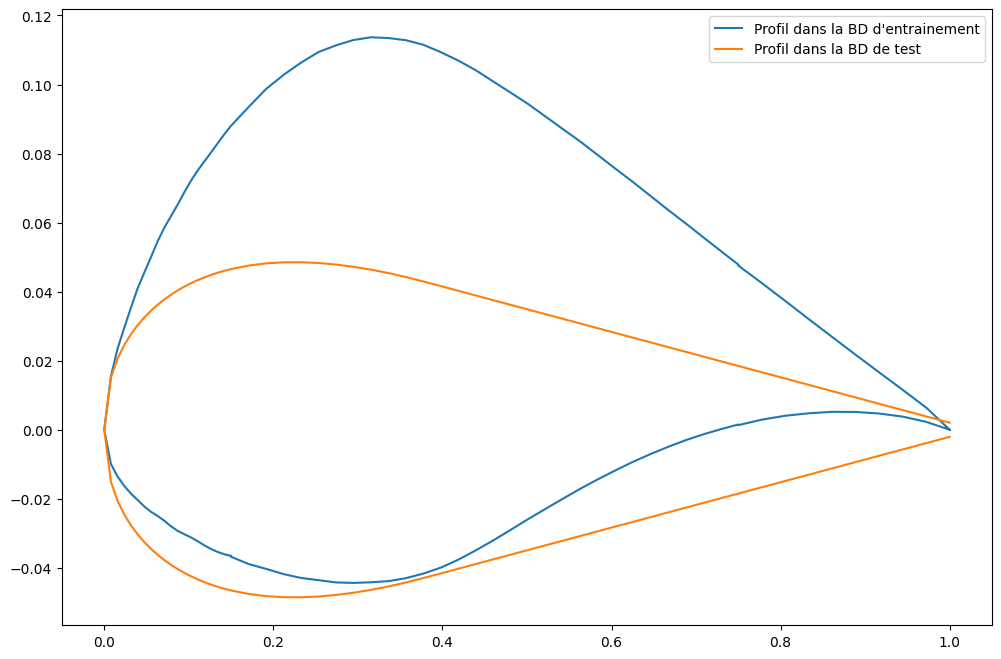

In [3]:
plt.figure(figsize = (12,8))
plt.plot(x_coord_ini,x_train[-1], label = "Profil dans la BD d'entrainement")
plt.plot(x_coord_ini,x_test[-1], label = 'Profil dans la BD de test')
plt.legend()
plt.show()

## Implementation du discriminateur

Le discriminateur est un modèle avec une entrée bidimensionnelle et une sortie unidimensionnelle. Il recevra un échantillon des données réelles ou du générateur et fournira la probabilité que l'échantillon appartienne aux données d'entraînement réelles.

In [104]:

discriminateur = Sequential()

discriminateur.add(Embedding((nb_coord,),(nb_coord,50)))
discriminateur.add(Dense())
print(.summary())



## Implementation du génerateur

Dans les réseaux adversariens génératifs, le générateur est le modèle qui prend en entrée des échantillons d'un espace latent et génère des données ressemblant à celles de l'ensemble d'apprentissage. Dans ce cas, c'est un modèle avec une entrée p-dimensionnelle, qui va recevoir des p points aléatoires , et une sortie p-dimensionnelle qui doit fournir des points ressemblant à ceux des données d'entraînement.

In [105]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 118),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

## Entrainement du modèle 

On utilise l'algorithme d'Adam pour entraîner les modèles de discriminateur et de générateur. On crée alors les optimiseurs en utilisant torch.optim

In [99]:
lr = 0.001
num_epochs = 3
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

On réalise alors l'entrainement

In [107]:
for epoch in range(num_epochs):
    for nb, (real_samples, _) in enumerate(train_loader):
        real_samples = torch.transpose(real_samples[0],0,1)
        # Data for training the discriminator
        real_samples_labels = torch.ones((4, 1))
        latent_space_samples = torch.randn((1, 100))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((4, 1))
        print(generated_samples.size(),real_samples.size())
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((n, p))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and nb == n - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

torch.Size([1, 118]) torch.Size([1, 118])


RuntimeError: expected scalar type Float but found Double